# 💄 Makeup Foundation Shades Analysis 💅🏻

Author: Loulou Vivian Mahfouz

Course Project, UC Irvine, Math 10, S23

## ✨ Introduction

This project is about makeup foundation shades which is makeup that matches one's skin color. Makeup users buy foundation to even out color, smoothen appearance, hide wrinkles, conceal blemishes, etc... I love makeup, art, fashion, music, and creativity in general so I thought that this would be an interesting dataset to work with and I could also learn something interesting.

So, I analyze bestselling makeup foundations to gain some insight to my overall guiding questions:

Do foundations really cover a wide range of shades (based on this dataset)?
Which brand(s) are **actually inclusive** of all/many shade ranges (based on this dataset)? 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

### 🔥 Definitions & Descriptions

Some definitions taken from [HSLA website](https://www.w3schools.com/colors/colors_hsl.asp)

Here are brief explanations of the columns in this dataset:

- brand - brand name
- brand_short - shortened brand name (for coding purposes & easier to read)
- product - specific bestseller foundation name 
- product_short - shortened product name
- hex - hexadecimal color coding to show the amount of red, blue, and green in a color 
- H - hue - particular shade/tint of a color (0 to 360 degrees on the color wheel)
- S - Saturation - intensity of a color - greyscale (0% completely grey to 100% no grey)
- V - (Alpha) Value - specifies opacity - dimension of lightness/darkness or intensity of the strength of light (0.0 fully transparent to 1.0 not transparent)
- L - Lightness - amount of light/brightness in a color (0% no light to 100% full light)

group column sorted numerically:
0: Fenty Beauty's PRO FILT'R Foundation Only
1: Make Up For Ever's Ultra HD Foundation Only
2: US Best Sellers
3: BIPOC-recommended Brands with BIPOC Founders
4: BIPOC-recommended Brands with White Founders
5: Nigerian Best Sellers
6: Japanese Best Sellers
7: Indian Best Sellers

In [2]:
df = pd.read_csv("shades.csv") #read the csv file
df.sample(20) # Here are 20 random row samples of the original dataset

,brand,brand_short,product,product_short,hex,H,S,V,L,group
619,L'Oréal,lo,True Match,tms,f0c7b3,20.0,0.25,0.94,83,7
432,Make Up For Ever,mu,Ultra HD,uhd,c98567,18.0,0.49,0.79,62,1
288,Laws of Nature,ln,Foxy Finish,ff,b19277,28.0,0.33,0.69,63,3
315,Lancôme,lc,Teint Idole,ti,d0975d,30.0,0.55,0.82,67,4
261,Black Up,bu,Matifying Fluid,mf,3b2218,17.0,0.59,0.23,16,3
510,Addiction,ad,The Foundation,tf,f3bc86,30.0,0.45,0.95,80,6
382,Bobbi Brown,br,Skin Long-Wear,slw,e2b996,28.0,0.34,0.89,78,4
455,House of Tara,ht,Oil Free,off,b68358,27.0,0.52,0.71,59,5
110,Estée Lauder,el,Double Wear,dw,5e3617,26.0,0.76,0.37,27,2
562,NARS,na,Velvet Matte,vm,e4aa7c,27.0,0.46,0.89,74,6


In [3]:
#Adding python dictionary column at the end of df with the group descriptions for each row (mentioned earlier)
group_dict = {
    0: 'Fenty Beauty\'s PRO FILT\'R Foundation Only',
    1: 'Make Up For Ever\'s Ultra HD Foundation Only',
    2: 'US Best Sellers',
    3: 'BIPOC-recommended Brands with BIPOC Founders',
    4: 'BIPOC-recommended Brands with White Founders',
    5: 'Nigerian Best Sellers',
    6: 'Japanese Best Sellers',
    7: 'Indian Best Sellers'
}

df['group_definition'] = df.group.map(group_dict)
df.sample(15)

,brand,brand_short,product,product_short,hex,H,S,V,L,group,group_definition
161,Covergirl + Olay,oc,Simply Ageless,sa,eac4ae,NaN,NaN,NaN,82,2,US Best Sellers
523,Shu Uemera,su,Petal Skin Fluid,psf,e0aa7c,28.0,0.45,0.88,74,6,Japanese Best Sellers
525,Shu Uemera,su,Petal Skin Fluid,psf,f9dabd,29.0,0.24,0.98,89,6,Japanese Best Sellers
359,MAC,ma,Studio Fix,sff,d9b28d,29.0,0.35,0.85,75,4,BIPOC-recommended Brands with White Founders
528,Shu Uemera,su,Petal Skin Fluid,psf,dbab6d,34.0,0.50,0.86,73,6,Japanese Best Sellers
581,Bharat & Doris,bd,Liquid Foundation,lf,cba167,35.0,0.49,0.80,69,7,Indian Best Sellers
281,Laws of Nature,ln,Foxy Finish,ff,6c4529,25.0,0.62,0.42,33,3,BIPOC-recommended Brands with BIPOC Founders
564,NARS,na,Velvet Matte,vm,da9b5a,30.0,0.59,0.85,69,6,Japanese Best Sellers
256,Black Up,bu,Matifying Fluid,mf,9e5a35,21.0,0.66,0.62,46,3,BIPOC-recommended Brands with BIPOC Founders
331,Lancôme,lc,Teint Idole,ti,391b11,15.0,0.70,0.22,14,4,BIPOC-recommended Brands with White Founders


### 🧹 Data Cleaning

In [4]:
df.isna().any() #Checking for missing values. Three columns contain some missing values here.

brand               False
brand_short         False
product             False
product_short       False
hex                 False
H                    True
S                    True
V                    True
L                   False
group               False
group_definition    False
dtype: bool

In [5]:
print(f"This dataset currently has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset currently has 625 rows and 11 columns


In [6]:
df.dropna(inplace=True) #dropping missing values
df.shape #shape of the df

(613, 11)

In [7]:
print(f"The Makeup-Shades dataset contains {df.shape[0]} rows and {df.shape[1]} columns after dropping rows with missing values")

The Makeup-Shades dataset contains 613 rows and 11 columns after dropping rows with missing values


### 🧐 Observing Data Info

In [8]:
df.dtypes #This is important in case I need to convert any values in the future

brand                object
brand_short          object
product              object
product_short        object
hex                  object
H                   float64
S                   float64
V                   float64
L                     int64
group                 int64
group_definition     object
dtype: object

In [9]:
df.describe().drop(columns="group")

,H,S,V,L
count,613.000000,613.000000,613.000000,613.000000
mean,25.314845,0.459494,0.779543,65.654160
std,5.327852,0.154089,0.173955,17.570246
min,4.000000,0.100000,0.200000,11.000000
25%,23.000000,0.350000,0.690000,55.000000
50%,26.000000,0.440000,0.840000,70.000000
75%,29.000000,0.560000,0.910000,79.000000
max,45.000000,1.000000,1.000000,95.000000


Table above shows us important numerical information about the data like the count, mean, standard deviation, min, max, quartiles for numerical columns. The count shows us how many cells of values there are in each column which makes sense why it is the same number as the row number. 
The mean for the group numbers, the min,max, and quartiles seems useless at the moment so I dropped that colum so we can ignore those values.

Approximately, the average hue is 25, the average saturation value is 0.45 or 45%, the average value (or alpha value) is 0.77, and the average lightness is 0.65 or 65%. 

Using this [HSLA Color Picker website](https://standardista.com/webkit/ch7/hsla.html), here is the generated mean shade:

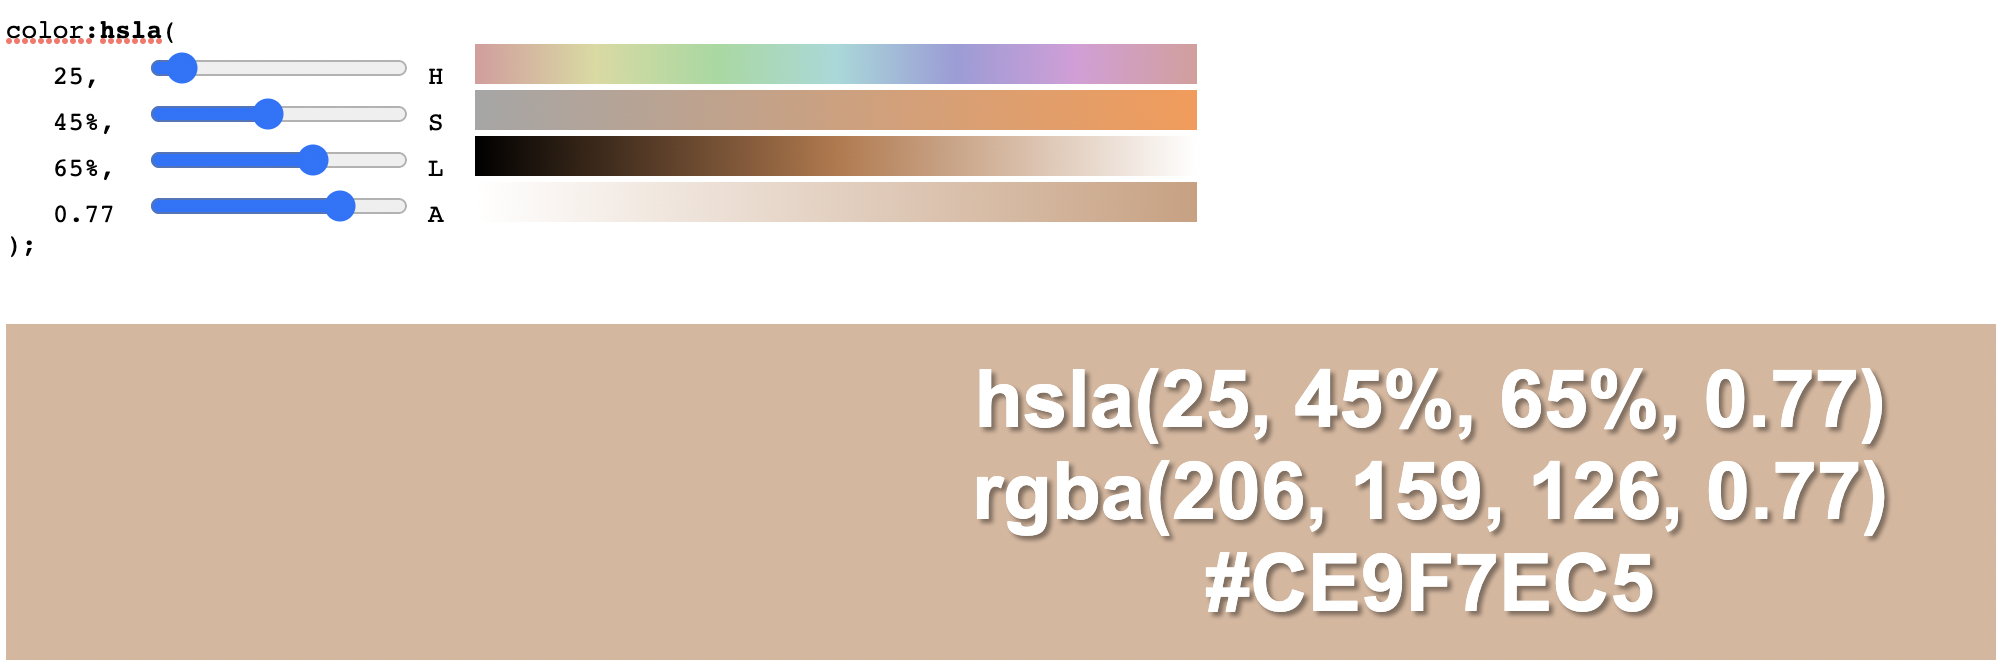

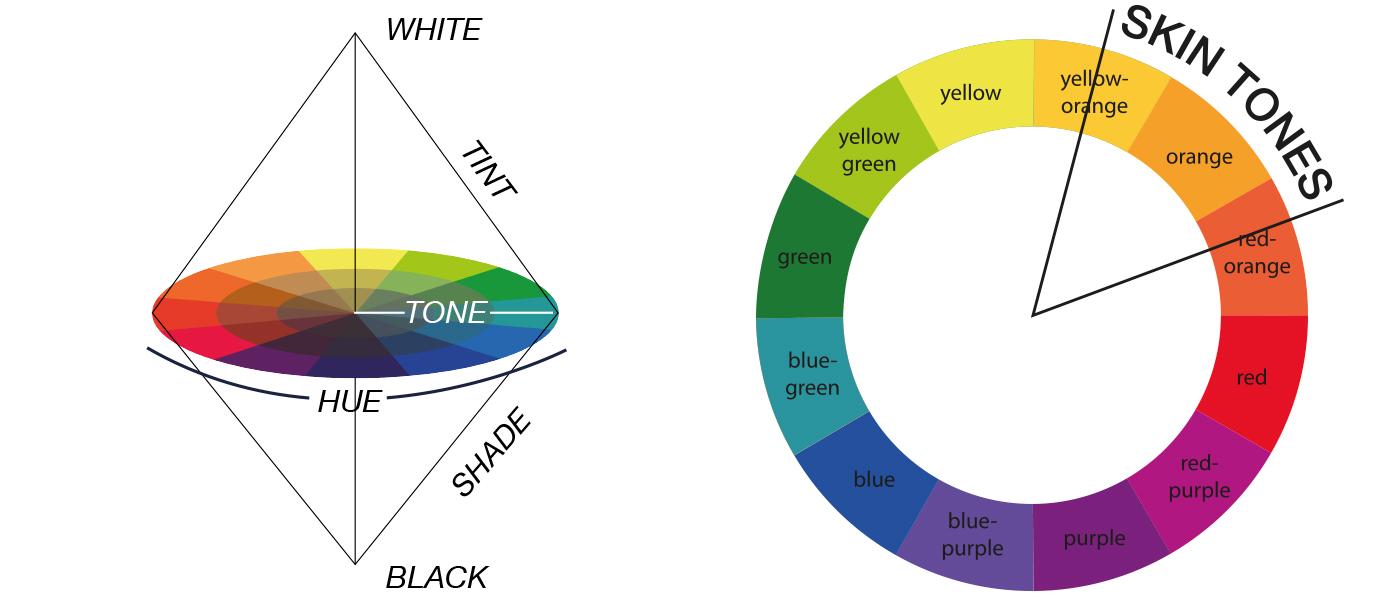

In [10]:
#(extra)
from PIL import Image
img = Image.open('Average HSLA.png')
mg = Image.open('colorwheel.jpg')
img.show()
mg.show()

The skin tones in general (hues) start from min of 4 degrees to max of 45 degrees in our case which makes sense looking at this wheel.

In [11]:
df.corr() #correlations

,H,S,V,L,group
H,1.000000,-0.166436,0.409831,0.451416,0.118561
S,-0.166436,1.000000,-0.707797,-0.810619,-0.048267
V,0.409831,-0.707797,1.000000,0.980690,0.165535
L,0.451416,-0.810619,0.980690,1.000000,0.145904
group,0.118561,-0.048267,0.165535,0.145904,1.000000


### Plots

This plot below shows us Lightness values vs the count. Lightness values range from 0 (black) to 100 (white). Since the lightness value tends to be mostly around the 70s, this could indicate that foundation shades are more skewed to the lighter shades since 70 is closer to 100 (white).

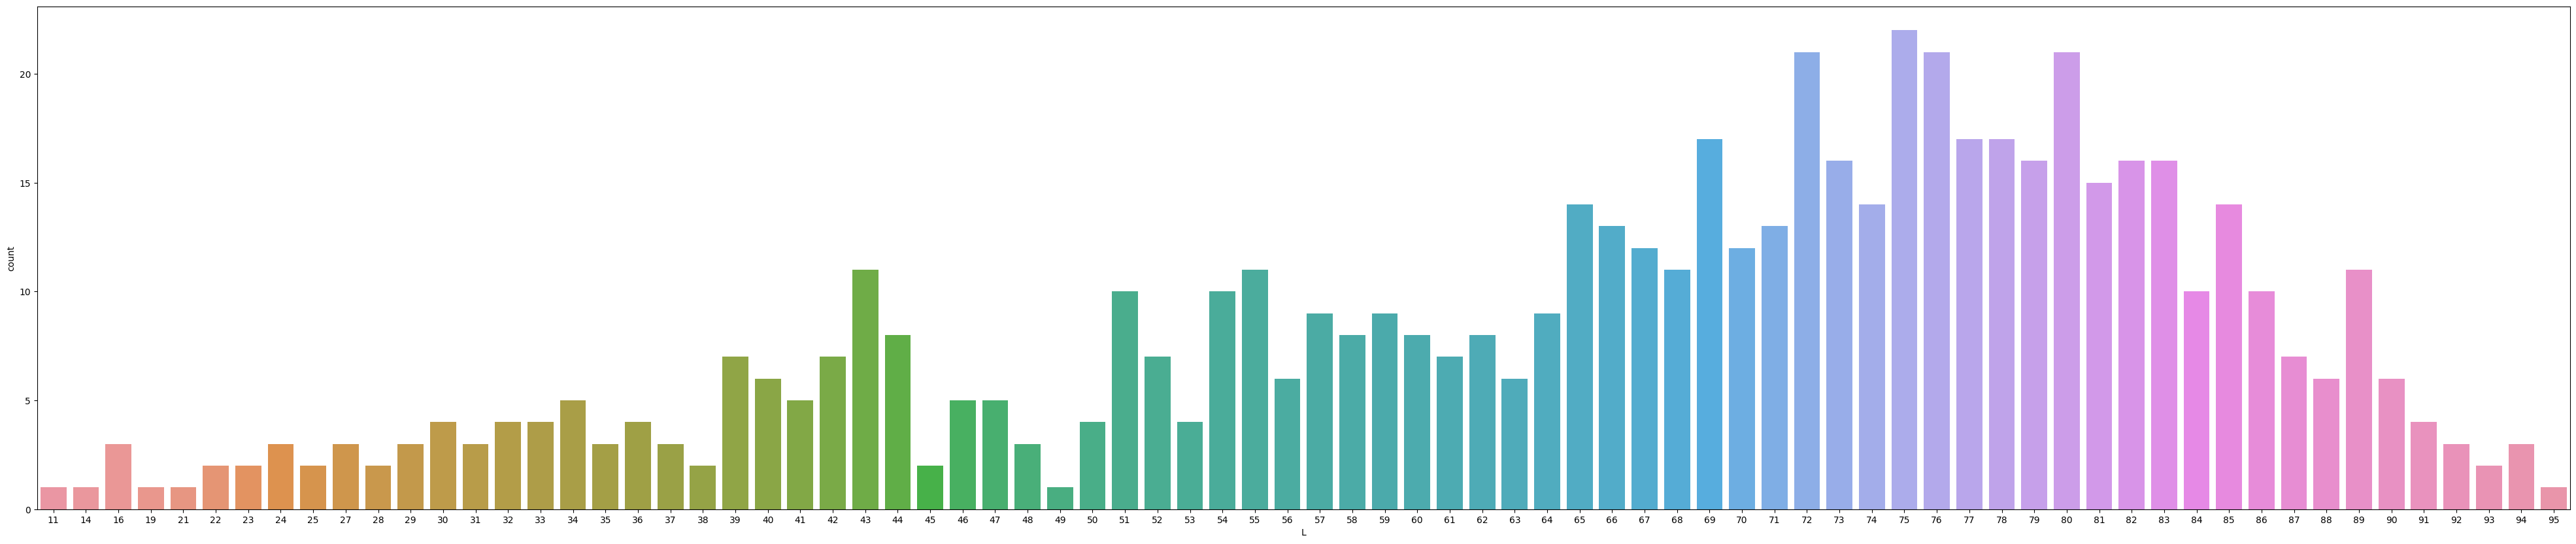

In [12]:
plt.figure(figsize=(50,10))
sns.countplot(x="L", data=df)
plt.show()

### ⚜️ Which brand(s) have the largest amount of bestsellers? What brands are popular? ⚜️

The bar chart below shows us the counts bestselling foundations for each brand. As we can see, Maybelline has the highest amount of bestseller foundations followed by Esteé Lauder, Mac, Make Up Forever, Fenty, Lancôme, and L'Oréal. I decided to group the color scheme by Lightness and it seems the bestseller brands have more of a wider range in the lightness values as you can see from the bar chart. 

So, it seems that these brands probably cater to more diverse shade ranges compared to the other brands with lesser bestsellers.

It looks like Fenty, Maybelline, Lancôme, and Esteé Lauder have the **widest** range of colors from this chart compared to the other bestseller brands. However, we can look more closely in the future graphs as it is hard to be sure from just this graph.

In [13]:
alt.Chart(df).mark_bar(color = "salmon").encode(
    x = alt.X('brand', sort='-y'), #bars in descending order
    y = alt.Y('count()'),
    color=alt.Color('L', scale=alt.Scale(scheme='redpurple')),
    tooltip = ["L"]
)

alt.Chart(...)

### Extra (Box & Whisker Plots)

- Code adapted from someone's [analysis of this dataset](https://www.kaggle.com/code/nataliakhol/makeup-shades-eda-clustering/notebook)

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
groups = df.group.unique().tolist()
def show_violin(column):
    fig = go.Figure()
    # 8 groups and 8 colors - hard-coded here
    for group, color in zip(groups, colors[:8]):
        # add violin plot for group
        fig.add_trace(go.Violin(x=df['group_definition'][df['group_definition'] == group],
                                y=df[column][df['group_definition'] == group],
                                name=group,
                                # boxplot with mean
                                box_visible=True,
                                meanline_visible=True,
                                # color
                                line_color=color
                               ))
    fig.update_layout(template='plotly_white', width=1200)
    fig.show()
def show_distribution(column, title=''):
    fig = go.Figure()
    fig = make_subplots(rows=1, cols=2, 
                        shared_yaxes=True, horizontal_spacing = 0.01)
    for group, color in zip(groups, colors[:8]):
        fig.add_trace(go.Box(y=df['group_definition'][df['group'] == group],
                                x=df[column][df['group'] == group],
                                name=group,
                                boxpoints='outliers', # only outliers
                                marker_color='black',
                                line_color='black',
                                fillcolor=color,
                                marker=dict(symbol="diamond"),
                                opacity=0.6), 
                      row=1, col=1)
    for group, color in zip(groups, colors[:8]):
      fig.add_trace(go.Violin(y=df['group_definition'][df['group'] == group],
                              x=df[column][df['group'] == group], 
                              line_color=color), 
                    row=1, col=2)
    # more space between group label and boxplot
    fig.update_yaxes(ticksuffix = ' '* 10) 

    fig.update_layout(template='plotly_white', width=1000, showlegend=False,
                      title=title,  title_x=0.5)
    fig.update_traces(orientation='h')
    fig.update_traces(side='positive', width=2, points=False, col=2)
    fig.show()

This super long code uses plotly to display box and whisker plots and the overall skew of the data. We can also use our mouse to hover over to get the min, median, etc... for more data values. I think this is a great way to visualize and **compare** the different groupings. 

Even though Fenty only has one product listed as a bestseller, the shape of the lightness data is the closest to a normal bell curve. Also, we can see that the  Japanese and Indian bestsellers are skewed to the right meaning these are closer to the whiter/lighter shades. This makes sense considering the shades of Japanese people, however, Indians can range from more darker to light people, so it is strange how their plots are similar. For Nigerian bestsellers, the plot is skewed more to the left, however I would think it would be much more towards the left (closer to value 0/black). This could be caused from a variety of reasons - possibly from not collecting a variety of data or brands simply catering more to lighter skin tones.

So, we can see that Fenty, US bestsellers, and BIPOC reccomended by BIPOC founders, BIPOC reccomended by White founder groups have the largest shade ranges (including outliers).

In [15]:
show_distribution('L', 'Lightness')

### 3D Plotting (Extra)

Below, I am using code with some help from AI to convert each hex value to rgb values that are normally easier to understand and used by computers. This code is not too complicated as we learned .apply, defining functions, and indexing in Math 10. The tricky part was figuring out how to convert to rgb values. So, I am adding this new column to the dataframe. I also separated the rgb values from a triple to having the red, green, and blue columns separated.

In [16]:
# Define a function to convert hex to RGB
def hex_to_rgb(hex):
    # Convert each pair of hex digits to an integer
    r = int(hex[0:2], 16)
    g = int(hex[2:4], 16)
    b = int(hex[4:6], 16)
    
    # Combine the integers to create an RGB tuple
    rgb = (r, g, b)
    
    # Return the RGB tuple
    return rgb

# Apply the function to each row of the hex code column
df['rgb'] = df['hex'].apply(hex_to_rgb)
df[['r', 'g', 'b']] = df['hex'].apply(hex_to_rgb).apply(pd.Series)

df.sample()

,brand,brand_short,product,product_short,hex,H,S,V,L,group,group_definition,rgb,r,g,b
371,MAC,ma,Studio Fix,sff,a0714d,26.0,0.52,0.63,52,4,BIPOC-recommended Brands with White Founders,"(160, 113, 77)",160,113,77


Here is a plot of the rgb values from all of the data. I thought it looked cool to visualise all of the shades in 3d!
- Code from Bing Chat AI

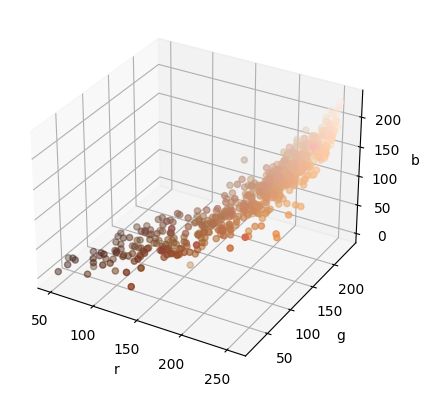

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the R, G, and B values from the DataFrame
R = df['r'].values
G = df['g'].values
B = df['b'].values

# Create a 3D plot using the Axes3D class
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the R, G, and B values on the 3D plot
ax.scatter(R, G, B, c=np.array([R, G, B]).T / 255)

# Set the labels for the axes
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')

# Show the plot
plt.show()

Here is the same data plot as above but we can rotate the figure, zoom, and use our cursor to get exact value points on the plot.
- Help from Bing Chat AI

In [18]:
import plotly.graph_objects as go

# Convert hex color codes to RGB - help from LA Hansen
df['color'] = '#' + df['hex'].str.lstrip('0x')

# Create color scale
unique_colors = df['color'].unique()
color_scale = [(p, color) for p, color in zip(np.linspace(0, 1, len(unique_colors)), unique_colors)]

# Create scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=df['r'],
    y=df['g'],
    z=df['b'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['color'],                # set color to an array/list of desired values
        colorscale=color_scale,           # choose a colorscale
        opacity=0.8
    )
))

# tight layout - help from LA Yufei
# This code is to view the data at an angle specified (rotating plot)
name = 'eye = (x:1.5, y:0., z:0.)'
camera = dict(
    eye=dict(x=1.5, y=0, z=0.)
)

fig.update_layout(scene_camera=camera, title=name)
fig.show()

## 💡 Kmeans clustering


- Code from Bing Chat AI

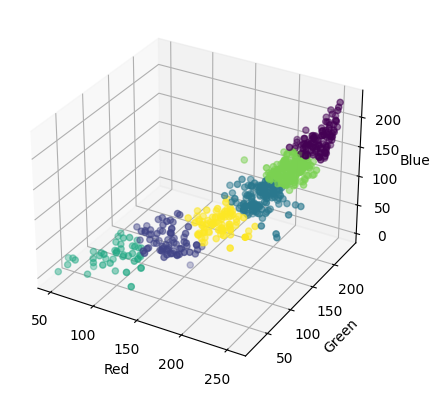

In [19]:
from sklearn.cluster import KMeans

# Extract the RGB values
rgb = df[['r', 'g', 'b']]

# Define the number of clusters
k = 6

# Fit the K-means model
kmeans = KMeans(n_clusters=k, random_state=0).fit(rgb)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original data
df['Cluster'] = labels



# Plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['r'], df['g'], df['b'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

Clusters are grouped by points nearest to them. So, we could use the tooltip below to check that out if interested.

Below, the 2d plot of r vs b is displayed. We use :N for discrete nominal no ordering data that is classified as categorical. So, the cluster numbers are just labels in this case.

In [20]:
#Since this is the k means clustering in 2 dimension, I chose to work with red & blue only.
col0 = "r"
col1 = "b"

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[[col0,col1]])
arr = kmeans.predict(df[[col0, col1]])
df["cluster"] = arr

alt.Chart(df).mark_circle(size = 50).encode(
    x=col0,
    y=col1,
    color="cluster:N", 
    tooltip = ["L","H","S","V","rgb", "brand"]
)

alt.Chart(...)

### Linear Regression

I would like to generate a line of best fit for my data x axis L and y axis V. Here we are fitting a regression model to the data. 

In [21]:
from sklearn.linear_model import LinearRegression
regg = LinearRegression()
regg.fit(df[["L"]], df["V"])

LinearRegression()

We use [0] to get the element inside the array.

In [22]:
regg.coef_[0] #coefficient/slope of line of best fit

0.009709348040742022

In [23]:
regg.intercept_ #y-intercept of line of best fit

0.14208414152087523

In [24]:
df["pred"] = regg.predict(df[["L"]])
df["pred"] # predicted Values

0      0.977088
1      1.035344
2      1.025635
3      0.996507
4      0.773192
         ...   
620    0.967379
621    0.947960
622    0.967379
623    0.938251
624    0.918832
Name: pred, Length: 613, dtype: float64

In [25]:
c7 = alt.Chart(df).mark_line(color="magenta").encode(
    x = "L",
    y = "pred"
)
c7

alt.Chart(...)

We use linear regression because we want to predict a continuous quantitative value, in this case the Alpha Values are our prediction.

In [26]:
c4 = alt.Chart(df).mark_circle().encode(
    x="L",
    y="V",
    color=alt.Color("brand", scale=alt.Scale(scheme="dark2")),
    tooltip = ["L", "H","V","S","brand"]
)
c4 + c7 #layering charts on top of each other

alt.LayerChart(...)

I think the line of best fit is a good fit for this data. Lightness increases, Value increases as well which makes sense since the slope is positive. As the lightness increases (closer to 100), then the the intensity of the strength of light increases (more opaque).
Note that the prediction line doesn't end at 1.0 or at 100 which are technically the maximum values possible for these V & L.

## 🌲 Decision Tree Classifier (Feature Engineering)

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=5)
cols = ["L", "H"]
clf.fit(df[cols], df["product"])

DecisionTreeClassifier(max_leaf_nodes=5)

I am using 5 leaf nodes, so the data is being divided into 5 products in this case. So,  the machine is trying to classify which product name it is based on the H and L values as you can see in the plot below.

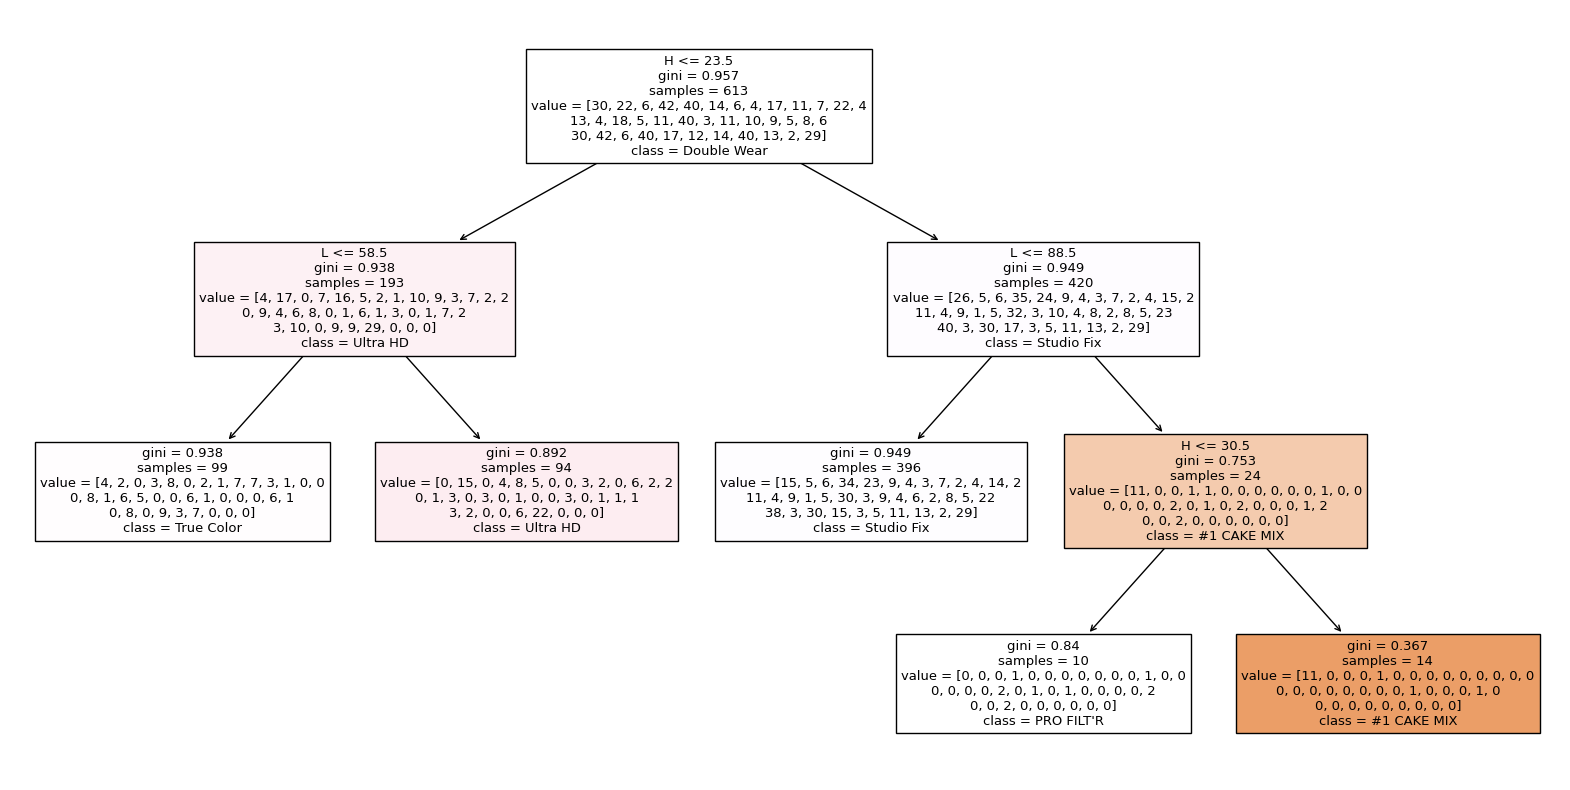

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, feature_names=clf.feature_names_in_, class_names=clf.classes_, filled=True)

Here we are splitting the data into testing and training sets. We use a train set for training the model while the test set is used to evaluate new unseen data. We do this to see how well the model can perform on new unseen data instead of just memorizing the data points which we do not want. Here, we use double brackets as our inputs since we need a 2D array for the inputs and our output/prediction is the product. I chose to have the train size be 20% of data.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[["L","H"]], df["product"], train_size = 0.2)

In [30]:
clf.score(X_test,y_test)

0.1384928716904277

The score is the accuracy score for the model's predictions. We see the score here for both the testing and training data.

In [31]:
clf.score(X_train,y_train)

0.11475409836065574

Here are the unique values in the product column. In other words, here is the sum of all the different product names.

In [32]:
len(df["product"].unique())

37

In [33]:
1/37

0.02702702702702703

We compare the test and training values to 1 / the number of product categories (37). So, 1/37 would be the probability of choosing one product. Since the test and training values are similar, there doesn't seem to be any signs of overfitting. So, we have a good number of leaf nodes in this case 5.

In [34]:
clf.classes_ #All of the product names 

array(['#1 CAKE MIX', 'ColorStay', 'Diorskin Forever', 'Double Wear',
       'Fit Me', 'Fit Me Matte', 'Flawless Finish', 'Foundation',
       'Foxy Finish', 'Full Coverage', 'Hi - Def', 'Infalliable',
       'Invisible Finish', 'Liquid Foundation', 'Make-Up Ecostay',
       'Matifying Fluid', 'Matte Wear', 'Oil Free', "PRO FILT'R",
       'Perfect Match', 'Petal Skin Fluid', 'Photo Perfect', 'RMK Liquid',
       'SKINgenius', 'Second to None', 'Secret Skin Maker Zero',
       'Skin Long-Wear', 'Studio Fix', 'Synchro Skin', 'Teint Idole',
       'The Foundation', 'True Color', 'True Match', 'Ultra HD',
       'Velvet Matte', 'X Factor', 'barePRO'], dtype=object)

### Plots

Below, I am displaying the data in an altair chart with the color to be pred2, the x axis to be H, and the y axis to be L. I am using 5 leaf nodes here.

In [35]:
df_art = pd.DataFrame(df, columns=cols)
df_art["product"] = df["product"]
df_art["pred2"] = clf.predict(df_art[cols])

c5= alt.Chart(df_art).mark_circle(size=50).encode(
    x = "H",
    y = "L",
    color=alt.Color("pred2", scale=alt.Scale(scheme="category20")),
    tooltip=["L", "H","product", "pred2"]
)
c5

alt.Chart(...)

From this chart above, I am predicting the product name based on lightness and hue values. We use classification to predict a discrete class label and categorize. Using the tooltip, we can see the true product names on the graph and the color code of the predicted product names. So, we are able to see points that it predicted correctly and incorrectly. We can clearly see the decision boundaries of each product.

- Repeating the same steps as above but with 100 leaf nodes to see a difference in the chart.

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=100)
cols = ["L", "H"]
clf.fit(df[cols], df["product"])
X_train, X_test, y_train, y_test = train_test_split(df[["L","H"]], df["product"], train_size = 0.2)
df_art = pd.DataFrame(df, columns=cols)
df_art["product"] = df["product"]
df_art["pred3"] = clf.predict(df_art[cols])

Since I am using 100 leaf nodes, we can see that there are more groups since we include more products and a larger leaf node value. So, the decision boundaries are less clear with the 100 leaf nodes since there are so many groups.

In [37]:
c5= alt.Chart(df_art).mark_circle(size=50).encode(
    x = "H",
    y = "L",
    color=alt.Color("pred3", scale=alt.Scale(scheme="category20")),
    tooltip=["L", "H","product", "pred3"]
)

c5

alt.Chart(...)

## Key Takeaways


It is important to note that there are brands that have 40 shades, however it is crucial to see **how the shades are distributed across the lightness ranges.** These images are from the article that this data was collected for which is referenced below.

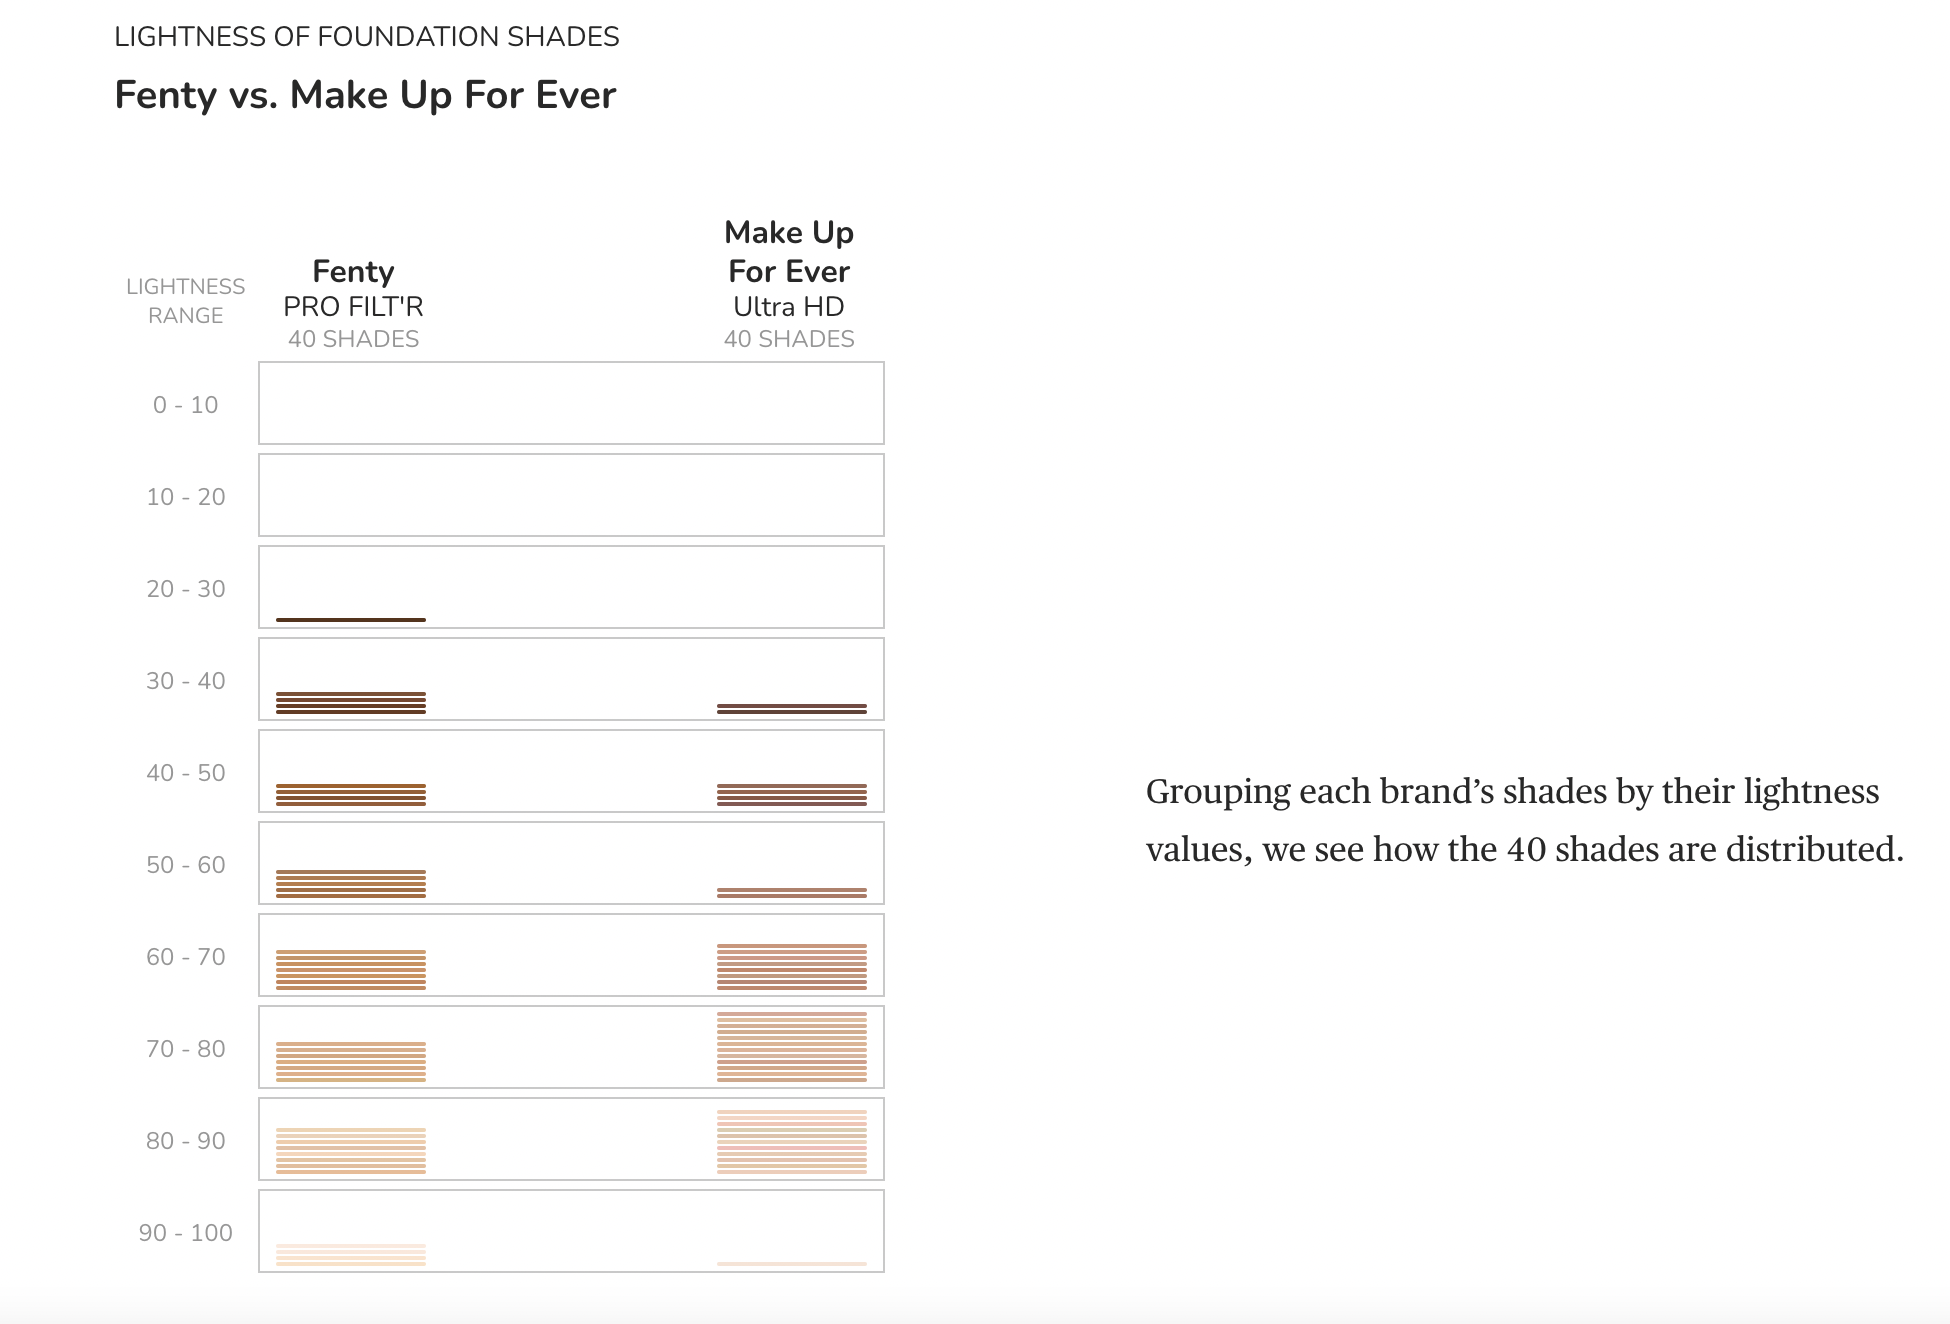

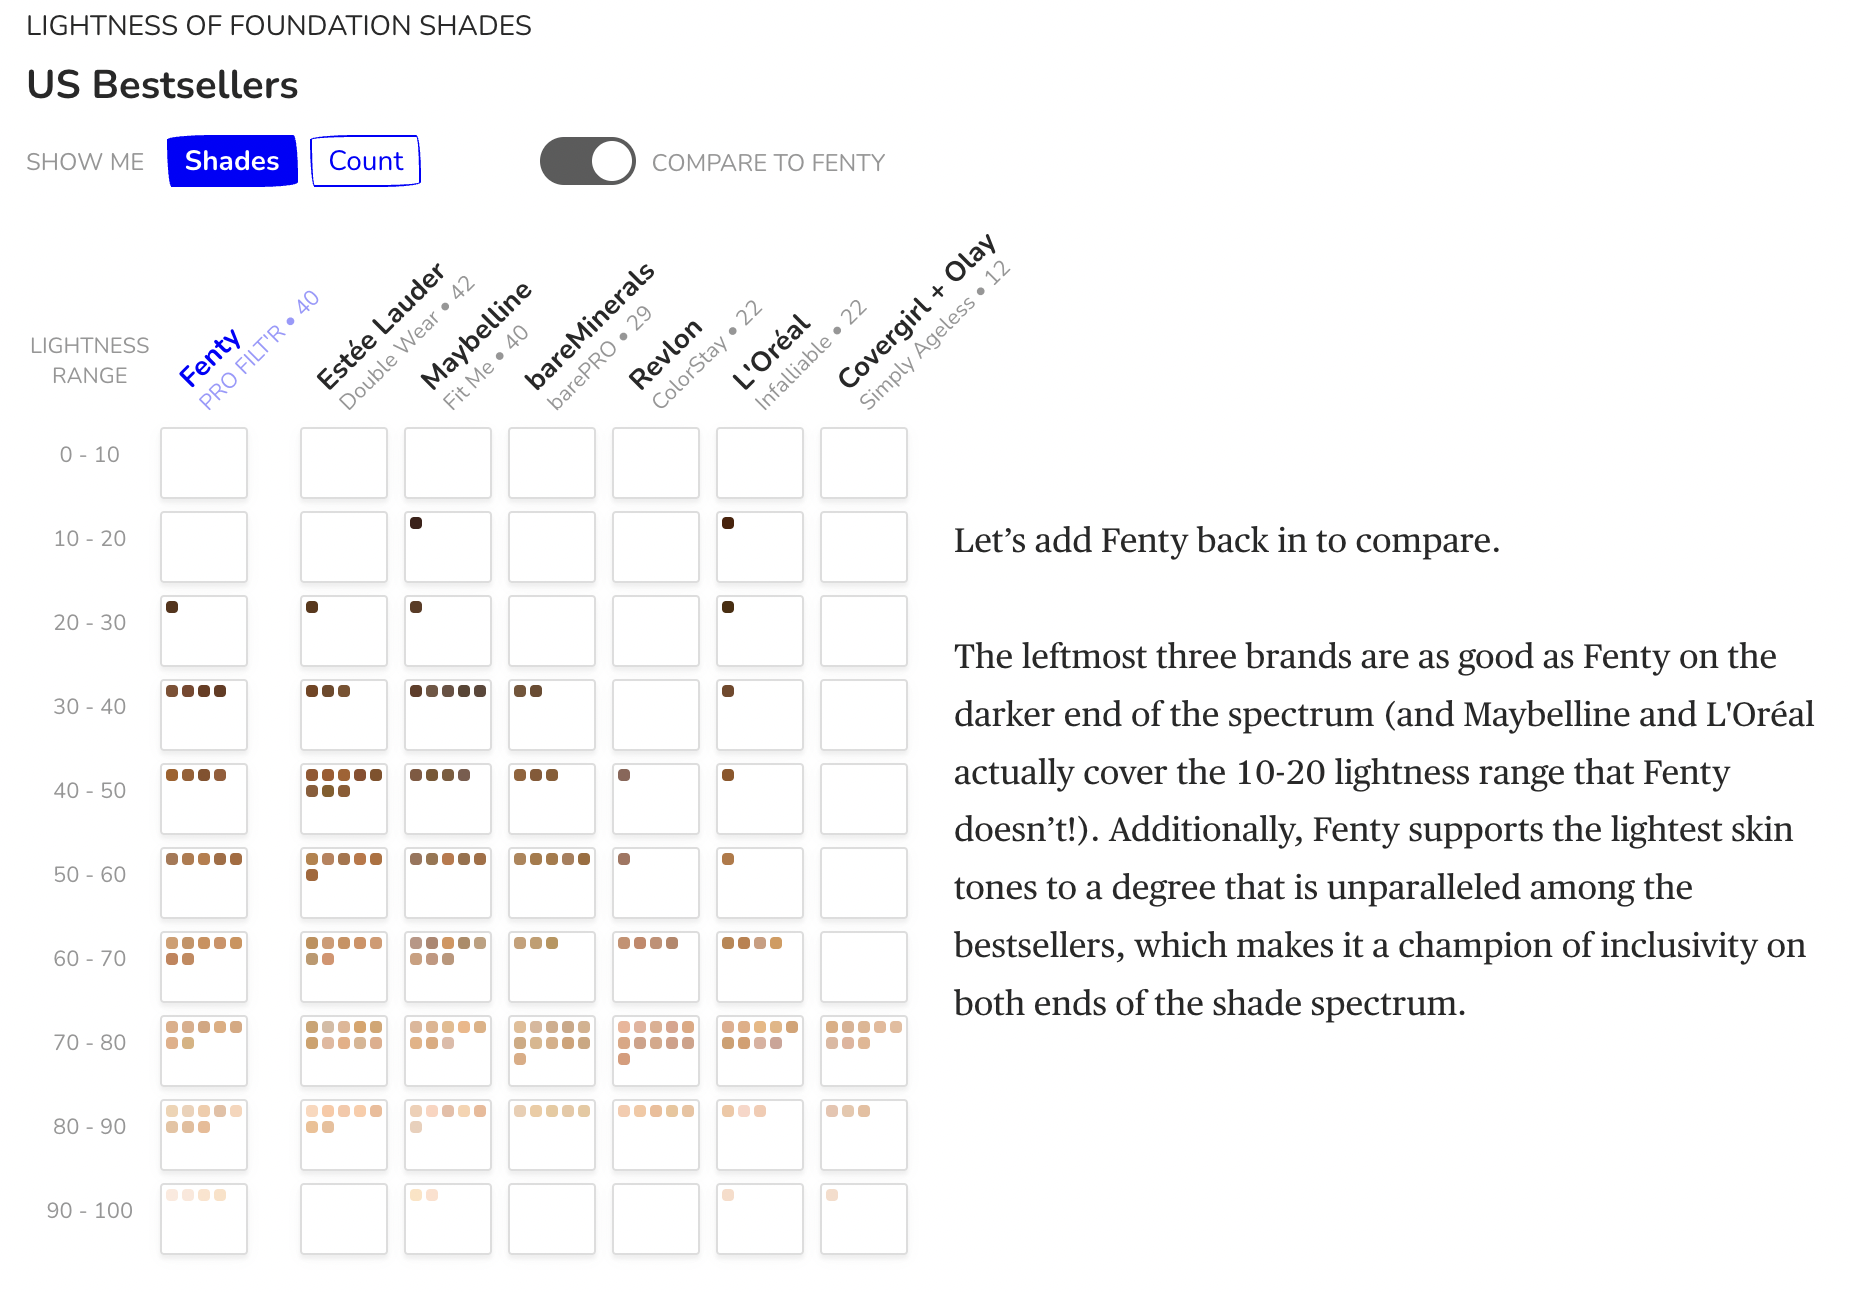

In [40]:
#(extra)
from PIL import Image
im = Image.open('Fenty vs Makeup Forever.png')
ag = Image.open('US Bestsellers.png')
im.show()
ag.show()

## The Ultimate Conclusion 😎

In terms of the data, I realized that the highest amount of popular bestselling brands mentioned above are really good in terms of actual representation of a variety of shade ranges as they have the most shade ranges. Are all brands inclusive of all shade ranges? No, as there are brands who do not have a wide range of shades - just because brands claim to have "dark and light" shades, that doesn't mean all/many shade ranges are acually covered and we could see this from the analysis above. I was able to get some kind of insight as to answering my main questions. Technically, I would need more deeper complex analysis to fully answer my questions more specifically. I liked having guiding questoins which directed my project and kept me motivated.

Even though the machine's predictions, testing, and training were nothing special, for next time I think there should be more variables that might make it all really complicated. I think this would require more complex code than what we learned in Math10, so I did not want to overcomplicate. I honestly had no idea that analysing colors had so many components so it got complicated to understand at times, but I learned a lot about code and colors which was awesome.

Honestly, I learned a lot about data science through this course and I learned how data science can apply to anything for instance AI websites like ChatGPT or Bing Chat. I also learned a lot about colors and hex codes which I had no clue about before. It is awesome how machines can predict things. I really learned a lot in this class and this class inspired me to go into the data science concentration!


## References

* What is the source of your dataset(s)?

I found my dataset on Kaggle. https://www.kaggle.com/datasets/shivamb/makeup-shades-dataset

* List any other references that you found helpful.

- I liked the format/content of this student example of Airlines so I got some inspiration from this: https://christopherdavisuci.github.io/UCI-Math-10-S22/Proj/StudentProjects/MitraRezvany.html
- Complex box&whisker plot codes taken from here https://www.kaggle.com/code/nataliakhol/makeup-shades-eda-clustering
- Hue descriptions & converting values https://donatbalipapp.medium.com/colours-maths-90346fb5abda 
- Bing Chat AI https://www.microsoft.com/en-us/edge/features/bing-chat?form=MT00D8
- Article that this data was collected for: https://pudding.cool/2018/06/makeup-shades/
- Class Lecture Notes
- Jinghao, Hansen, Yufei, & Professor Davis :)

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c27b1381-f7f1-4004-a5ab-74980aec87f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>